# EDA Avanzado: Consumer Complaint Database (CFPB)

# 1. Introducción y carga de datos
----



### - Importar librerías necesarias
### - Cargar el dataset desde la URL oficial
### - Vista rápida de dimensiones y primeras filas


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Cargar dataset
df = pd.read_csv('data/complaints.csv')

C:\Users\diate\AppData\Local\Temp\ipykernel_12916\4215099070.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/complaints.csv')


In [3]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-03-21,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,Experian Information Solutions Inc.,LA,71202,NaN,NaN,Web,2025-03-21,In progress,Yes,NaN,12594563
1,2025-03-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,75072,NaN,NaN,Web,2025-03-17,In progress,Yes,NaN,12517859
2,2025-03-19,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,10467,NaN,NaN,Web,2025-03-19,In progress,Yes,NaN,12566690
3,2025-04-04,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,770XX,NaN,NaN,Web,2025-04-04,In progress,Yes,NaN,12829196
4,2025-04-04,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",TX,75204,NaN,NaN,Web,2025-04-04,In progress,Yes,NaN,12816687


In [4]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [5]:
print("Shape del dataset:", df.shape)

Shape del dataset: (8509423, 18)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8509423 entries, 0 to 8509422
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.1+

In [7]:
df.describe()

,Complaint ID
count,8.509423e+06
mean,7.391333e+06
std,3.431805e+06
min,1.000000e+00
25%,4.442600e+06
50%,7.764349e+06
75%,1.033037e+07
max,1.284232e+07


In [8]:
df.columns[df.isnull().any()].tolist()

['Sub-product',
 'Issue',
 'Sub-issue',
 'Consumer complaint narrative',
 'Company public response',
 'State',
 'ZIP code',
 'Tags',
 'Consumer consent provided?',
 'Company response to consumer',
 'Consumer disputed?']

# 2. Preprocesado inicial
----

### - Seleccionar columnas de interés
### - Seleccionar columnas de interés
### - Renombrar columnas para facilitar el trabajo
### - Conversión de fechas
### - Comprobación de valores nulos

In [9]:
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace("-", "_").str.replace("?", "")

cols = [
    'date_received', 'product', 'sub_product',
    'issue', 'sub_issue', 'company', 'state',
    'zip_code', 'submitted_via',
    'company_response_to_consumer', 'timely_response', 
    'consumer_disputed', 'consumer_complaint_narrative'
]
new_df = df[cols]

In [10]:
display(new_df.head())


,date_received,product,sub_product,issue,sub_issue,company,state,zip_code,submitted_via,company_response_to_consumer,timely_response,consumer_disputed,consumer_complaint_narrative
0,2025-03-21,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,Experian Information Solutions Inc.,LA,71202,Web,In progress,Yes,NaN,NaN
1,2025-03-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,75072,Web,In progress,Yes,NaN,NaN
2,2025-03-19,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,10467,Web,In progress,Yes,NaN,NaN
3,2025-04-04,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,770XX,Web,In progress,Yes,NaN,NaN
4,2025-04-04,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,"EQUIFAX, INC.",TX,75204,Web,In progress,Yes,NaN,NaN


In [11]:
df2 = [c for c in df.columns if c not in cols]
df2

['company_public_response',
 'tags',
 'consumer_consent_provided',
 'date_sent_to_company',
 'complaint_id']

In [12]:
new_df.shape

(8509423, 13)

In [13]:
new_df['date_received'] = pd.to_datetime(new_df['date_received'])

# Porcentaje de valores nulos
(new_df.isnull().mean() * 100).sort_values(ascending=False)

C:\Users\diate\AppData\Local\Temp\ipykernel_12916\288948086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date_received'] = pd.to_datetime(new_df['date_received'])


consumer_disputed               90.971139
consumer_complaint_narrative    68.091820
sub_issue                        9.715312
sub_product                      2.765111
state                            0.619454
zip_code                         0.355230
company_response_to_consumer     0.000235
issue                            0.000071
date_received                    0.000000
product                          0.000000
company                          0.000000
submitted_via                    0.000000
timely_response                  0.000000
dtype: float64

In [14]:
new_df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'company', 'state', 'zip_code', 'submitted_via',
       'company_response_to_consumer', 'timely_response', 'consumer_disputed',
       'consumer_complaint_narrative'],
      dtype='object')

# 3. Ingeniería de Características
----

In [15]:
# Nueva variable: año y mes de recepción
new_df['year'] = new_df['date_received'].dt.year
new_df['month'] = new_df['date_received'].dt.month
new_df.to_csv("new_dataset.csv", index=False)


# Agrupación: número de reclamaciones por empresa
company_counts = new_df['company'].value_counts()
new_df['company_volume'] = new_df['company'].map(company_counts)
display(company_counts)

# Variable categórica agrupada: producto general
top_products = df['product'].value_counts().index[:5]
new_df['product_simplified'] = new_df['product'].apply(lambda x: x if x in top_products else 'Other')
display(top_products)

C:\Users\diate\AppData\Local\Temp\ipykernel_12916\2554033912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['year'] = new_df['date_received'].dt.year
C:\Users\diate\AppData\Local\Temp\ipykernel_12916\2554033912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['month'] = new_df['date_received'].dt.month
C:\Users\diate\AppData\Local\Temp\ipykernel_12916\2554033912.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

company
EQUIFAX, INC.                             1990632
TRANSUNION INTERMEDIATE HOLDINGS, INC.    1948017
Experian Information Solutions Inc.       1840921
BANK OF AMERICA, NATIONAL ASSOCIATION      154523
WELLS FARGO & COMPANY                      143462
                                           ...   
Conville & Conville, PLLC                       1
Mortgage Professionals, Inc.                    1
SETERUS INC                                     1
Aidenbaum Schloff and Bloom PLLC                1
Credit Points 720                               1
Name: count, Length: 7578, dtype: int64

C:\Users\diate\AppData\Local\Temp\ipykernel_12916\2554033912.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['product_simplified'] = new_df['product'].apply(lambda x: x if x in top_products else 'Other')


Index(['Credit reporting or other personal consumer reports',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Mortgage', 'Checking or savings account'],
      dtype='object', name='product')

# 4. Análisis avanzado de valores faltantes y tipos
-----


C:\Users\diate\AppData\Local\Temp\ipykernel_12916\926507522.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_percent.values, y=null_percent.index, palette="Reds_r")


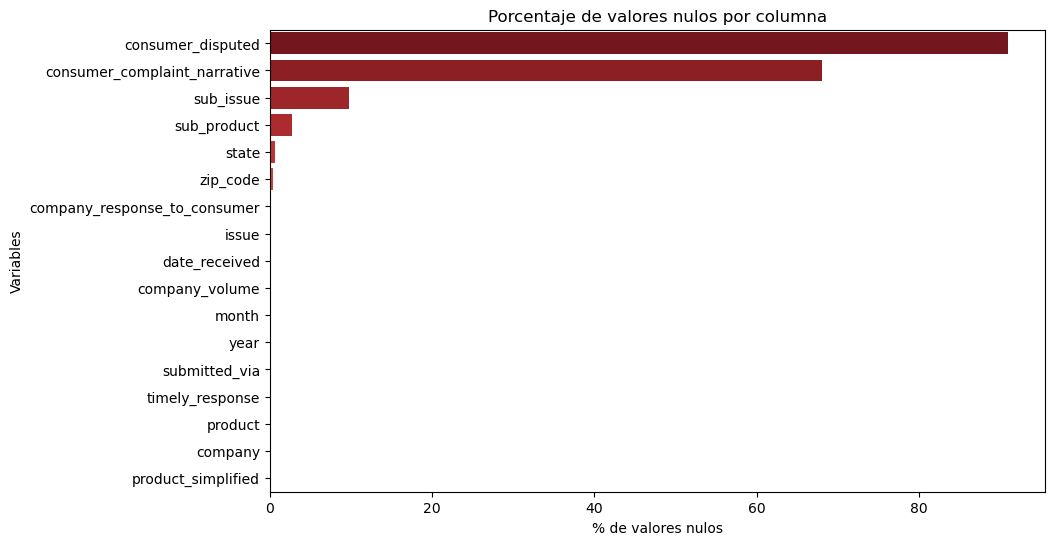

Tipos de datos por columna:
date_received                   datetime64[ns]
product                                 object
sub_product                             object
issue                                   object
sub_issue                               object
company                                 object
state                                   object
zip_code                                object
submitted_via                           object
company_response_to_consumer            object
timely_response                         object
consumer_disputed                       object
consumer_complaint_narrative            object
year                                     int32
month                                    int32
company_volume                           int64
product_simplified                      object
dtype: object


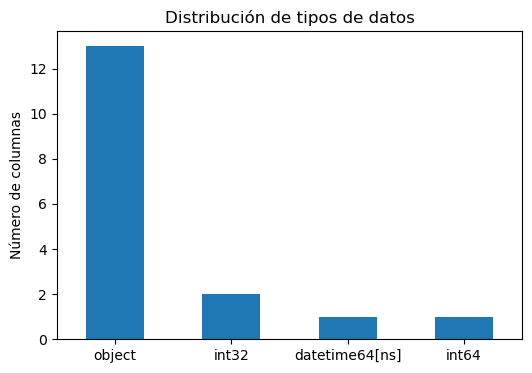

In [16]:
# Porcentaje de valores nulos por columna
null_percent = new_df.isnull().mean().sort_values(ascending=False) * 100

# Visualización del % de nulos
plt.figure(figsize=(10, 6))
sns.barplot(x=null_percent.values, y=null_percent.index, palette="Reds_r")
plt.title("Porcentaje de valores nulos por columna")
plt.xlabel("% de valores nulos")
plt.ylabel("Variables")
plt.show()

# Tipos de datos
print("Tipos de datos por columna:")
print(new_df.dtypes)

# Distribución de tipos de dato
type_counts = new_df.dtypes.value_counts()

plt.figure(figsize=(6, 4))
type_counts.plot(kind='bar')
plt.title("Distribución de tipos de datos")
plt.ylabel("Número de columnas")
plt.xticks(rotation=0)
plt.show()

# 5. Análisis univariado
-----

### - Reclamaciones por producto
### - Visualización de frecuencia de variables categóricas


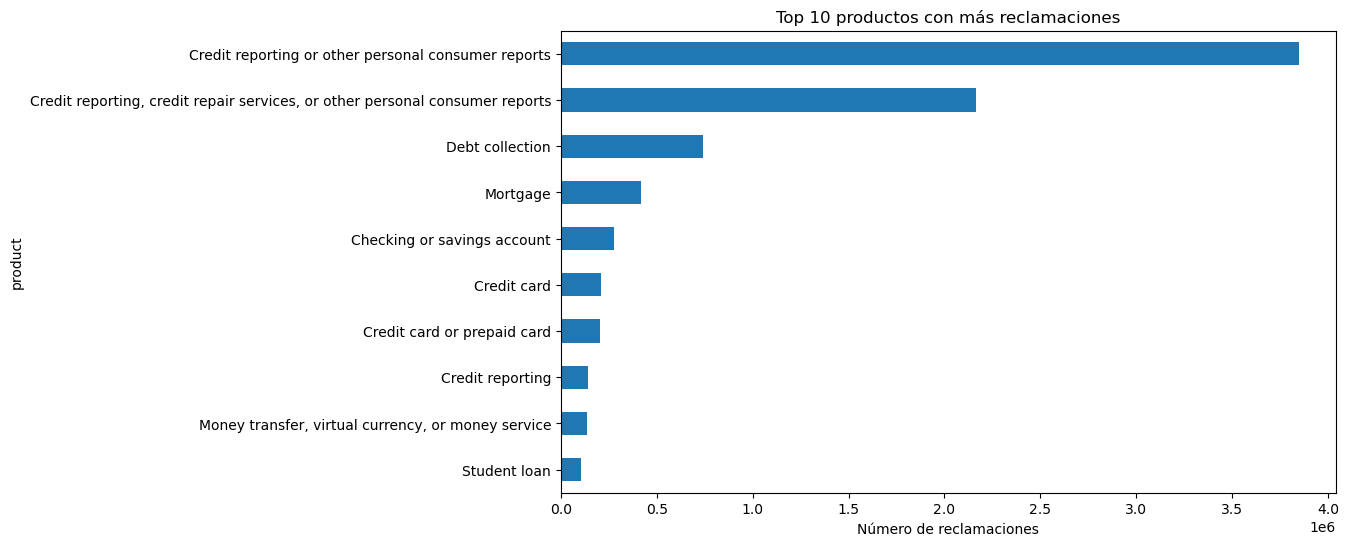

In [17]:

plt.figure(figsize=(10, 6))
new_df['product'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 productos con más reclamaciones")
plt.xlabel("Número de reclamaciones")
plt.gca().invert_yaxis()
plt.show()

# 6. Análisis temporal
------


### - Reclamaciones por mes
### - Tendencias temporales


C:\Users\diate\AppData\Local\Temp\ipykernel_12916\3371207290.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  new_df.set_index('date_received').resample('M').size().plot()


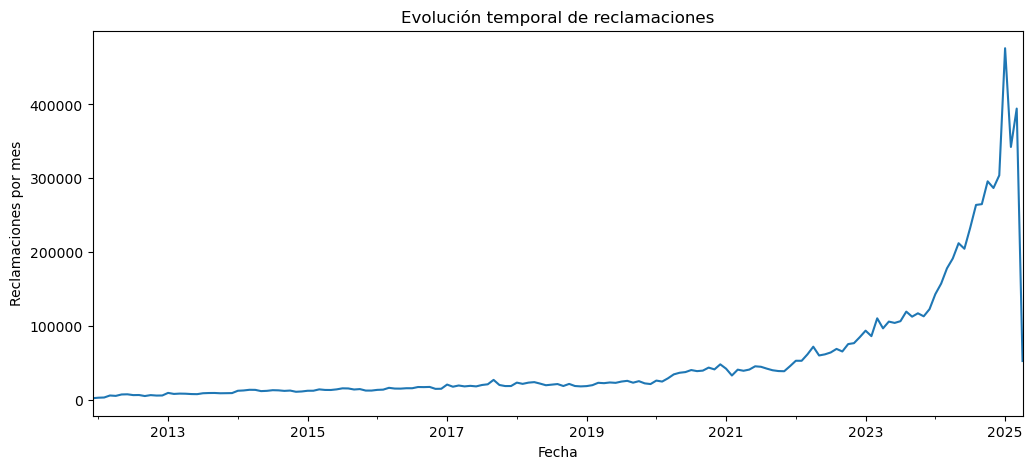

In [18]:
plt.figure(figsize=(12, 5))
new_df.set_index('date_received').resample('M').size().plot()
plt.title("Evolución temporal de reclamaciones")
plt.ylabel("Reclamaciones por mes")
plt.xlabel("Fecha")
plt.show()

In [19]:
top_productes = new_df['product'].value_counts().nlargest(10).reset_index()
top_productes.columns = ['product', 'count']

fig = px.bar(top_productes, 
             x='count', y='product', 
             orientation='h',
             title="Top 10 productos con más reclamaciones",
             labels={'count': 'Número de reclamaciones', 'product': 'Producto'},
             color='count',
             color_continuous_scale='Reds')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

# 7. Análisis multivariado
-----

### - Relación entre producto y forma de envío
### - Respuesta de la empresa según producto


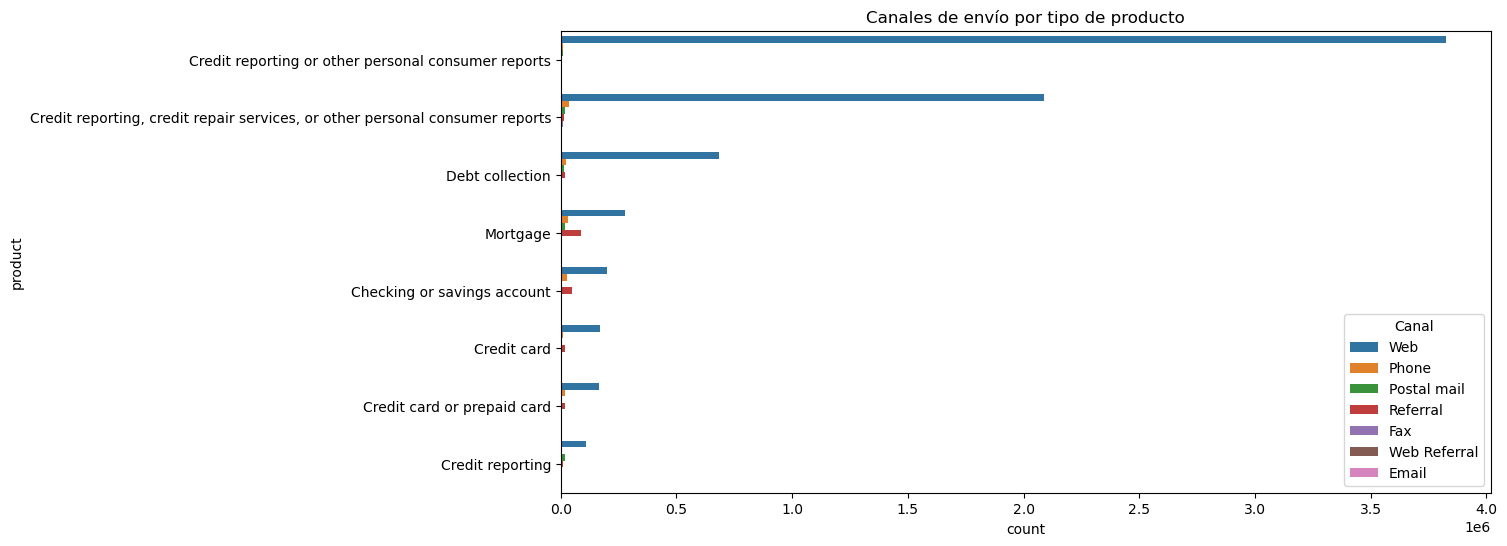

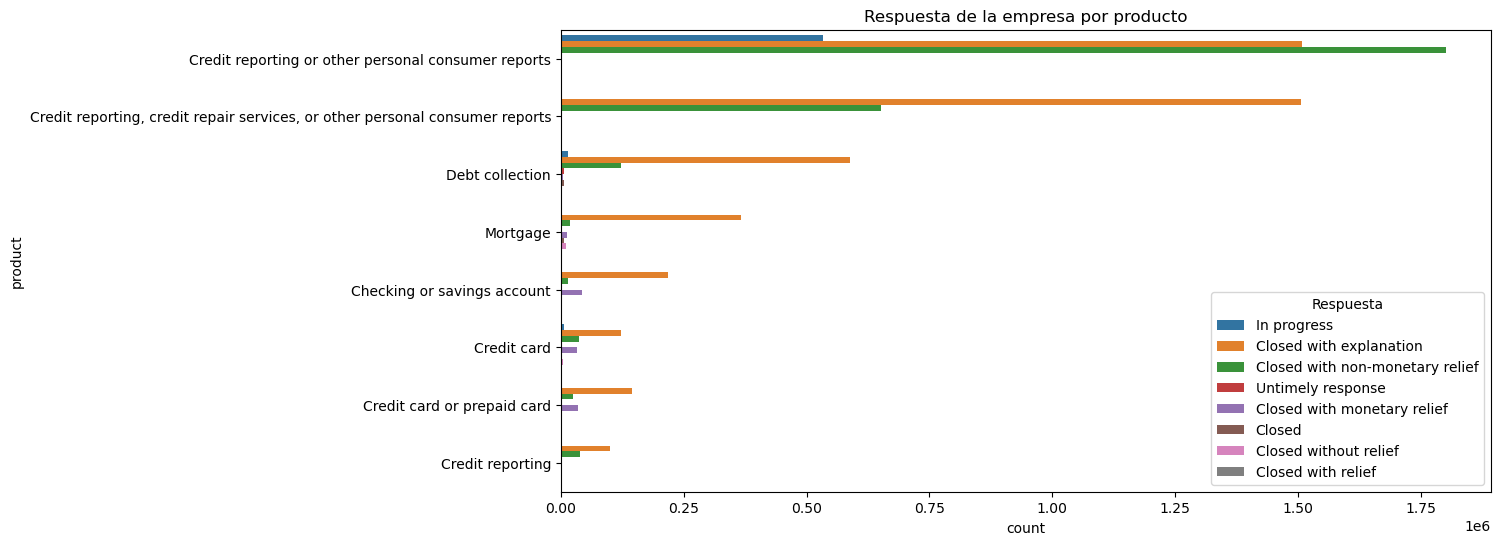

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=new_df, y='product', hue='submitted_via', order=new_df['product'].value_counts().index[:8])
plt.title("Canales de envío por tipo de producto")
plt.legend(title='Canal')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=new_df, y='product', hue='company_response_to_consumer', order=new_df['product'].value_counts().index[:8])
plt.title("Respuesta de la empresa por producto")
plt.legend(title='Respuesta')
plt.show()

In [21]:
fig = px.treemap(new_df.dropna(subset=['product', 'sub_product']), 
                 path=['product', 'sub_product'], 
                 title='Distribución jerárquica de productos y subproductos',
                 color_discrete_sequence=px.colors.sequential.Pinkyl)
fig.show(config={
    'displaylogo': False,
    'modeBarButtonsToAdd': ['drawline', 'drawopenpath', 'drawcircle', 'drawrect', 'eraseshape'],
    'displayModeBar': True,
    'scrollZoom': True
})

In [22]:
# Agrupamos quejas por estado
state_counts = new_df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'num_quejas']

fig = px.choropleth(state_counts, 
                    locations='state', 
                    locationmode="USA-states", 
                    color='num_quejas',
                    scope="usa",
                    color_continuous_scale="Reds",
                    title="Número de reclamaciones por estado")
fig.show(config={
    'displaylogo': False,
    'modeBarButtonsToAdd': ['drawline', 'drawopenpath', 'drawcircle', 'drawrect', 'eraseshape'],
    'displayModeBar': True,
    'scrollZoom': True
})

# 8. Análisis de texto (introductorio)
-----



### - Distribución de narrativas de quejas
### - Mostrar algunos ejemplos de texto


In [23]:

narrativas = new_df['consumer_complaint_narrative'].dropna()
print("Ejemplos de narrativas:")
print(narrativas.sample(3, random_state=42).values)


Ejemplos de narrativas:
['Hello, I am writing to delete the following information in my file. The items I need deleted are listed in the report. I am a victim of identity theft and did not make the charge. I ask that the items be deleted to correct my credit report. I reported the theft of my identity to the Federal Trade Commission and I also have enclosed copies of the Federal Trade Commissions Identity Theft Affidavit. Please delete the items as soon as possible. Based on, 15 U.S. Code 1681c2 a consumer reporting agency shall block the reporting of any information in the file of a consumer that the consumer identifies as information that resulted from an alleged identity theft, not later than 4 business days after the date of receipt.'
 'In accordance with the Fair Credit Reporting Act.\n\nThe Following Accounts have violated my Federally Protected Consumer Rights to privacy and confidentiality under 15 USC 1681.\n\nEverything has to be 100 % accurate on my Credit Report.\n\nThe Cre

In [24]:
# Subconjunto de datos con narrativa disponible
text_df = new_df[new_df['consumer_complaint_narrative'].notnull()].copy()

# Vistazo a algunas narrativas
print("Ejemplos de quejas:\n")
for i, texto in enumerate(text_df['consumer_complaint_narrative'].sample(3, random_state=42), 1):
    print(f"--- Ejemplo {i} ---\n{texto[:500]}...\n")

Ejemplos de quejas:

--- Ejemplo 1 ---
Hello, I am writing to delete the following information in my file. The items I need deleted are listed in the report. I am a victim of identity theft and did not make the charge. I ask that the items be deleted to correct my credit report. I reported the theft of my identity to the Federal Trade Commission and I also have enclosed copies of the Federal Trade Commissions Identity Theft Affidavit. Please delete the items as soon as possible. Based on, 15 U.S. Code 1681c2 a consumer reporting agen...

--- Ejemplo 2 ---
In accordance with the Fair Credit Reporting Act.

The Following Accounts have violated my Federally Protected Consumer Rights to privacy and confidentiality under 15 USC 1681.

Everything has to be 100 % accurate on my Credit Report.

The Credit Bureaus stated my account was properly investigated, How is that possible? There are still multiple in accuracies? Open Date is inaccurate, the date last active is inaccurate and the Date las

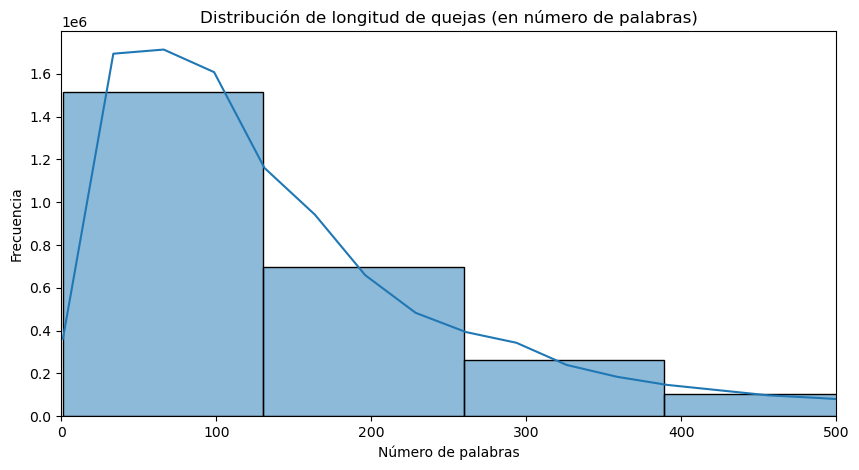

In [25]:
# Añadimos columna con longitud en palabras
text_df['n_palabras'] = text_df['consumer_complaint_narrative'].apply(lambda x: len(x.split()))

# Histograma de longitud de quejas
plt.figure(figsize=(10, 5))
sns.histplot(text_df['n_palabras'], bins=50, kde=True)
plt.title("Distribución de longitud de quejas (en número de palabras)")
plt.xlabel("Número de palabras")
plt.ylabel("Frecuencia")
plt.xlim(0, 500)
plt.show()

Processando textos: 100%|██████████| 2715202/2715202 [02:28<00:00, 18311.56it/s]


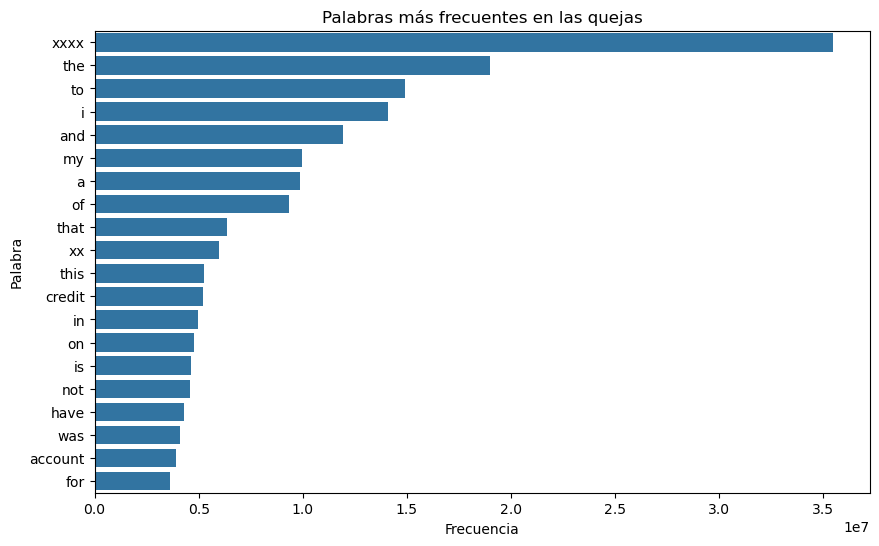

In [26]:
from collections import Counter
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Função de limpeza rápida
def limpiar(texto):
    texto = texto.lower()
    texto = re.sub(r'[^a-z\s]', ' ', texto)  # Mantém apenas letras e espaços
    return texto

# Inicializa contador global
contador = Counter()

# Itera com barra de progresso
for texto in tqdm(text_df['consumer_complaint_narrative'].dropna(), desc="Processando textos"):
    palabras = limpiar(texto).split()
    contador.update(palabras)

# Extrai as 20 palavras mais comuns
top_words = contador.most_common(20)
palabras, freqs = zip(*top_words)

# Visualização com Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=list(freqs), y=list(palabras))
plt.title("Palabras más frecuentes en las quejas")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()


# 9. Reflexión y Exploración Guiada
------



Al finalizar el análisis, reflexionamos con las siguientes preguntas que combinan lo estructurado, lo visual y lo textual:

---


# 1. Análisis Exploratorio
----

### 🧩 **Preguntas generales sobre el dataset**

## 1.1 ¿Qué productos acumulan mayor volumen de reclamaciones?

Top 10 Productos con más reclamaciones:
product
Credit reporting or other personal consumer reports                             3847495
Credit reporting, credit repair services, or other personal consumer reports    2163862
Debt collection                                                                  743265
Mortgage                                                                         417506
Checking or savings account                                                      277703
Credit card                                                                      208011
Credit card or prepaid card                                                      206370
Credit reporting                                                                 140429
Money transfer, virtual currency, or money service                               138407
Student loan                                                                     104488
Name: count, dtype: int64


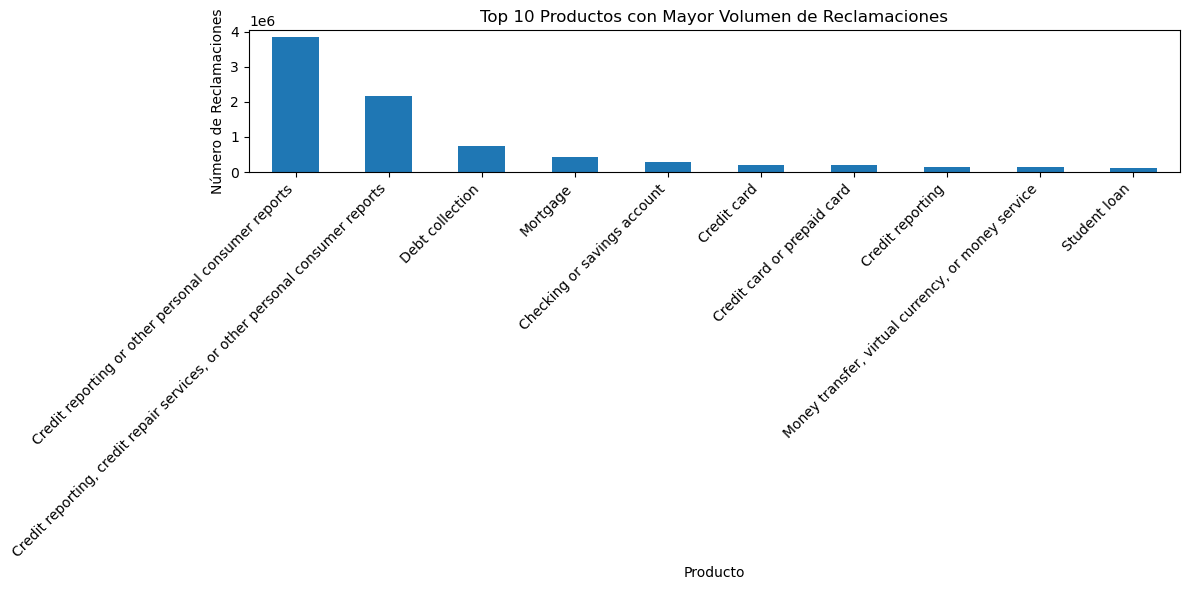

In [27]:
# Top 10 productos con más reclamaciones
top_products = new_df['product'].value_counts().head(10)
print('Top 10 Productos con más reclamaciones:')
print(top_products)

# Visualización
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Productos con Mayor Volumen de Reclamaciones')
plt.xlabel('Producto')
plt.ylabel('Número de Reclamaciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 1.2 ¿Qué empresas destacan por recibir un número elevado de quejas?

Top 15 Empresas con más quejas:
company
EQUIFAX, INC.                             1990632
TRANSUNION INTERMEDIATE HOLDINGS, INC.    1948017
Experian Information Solutions Inc.       1840921
BANK OF AMERICA, NATIONAL ASSOCIATION      154523
WELLS FARGO & COMPANY                      143462
JPMORGAN CHASE & CO.                       138440
CAPITAL ONE FINANCIAL CORPORATION          125449
CITIBANK, N.A.                             109475
SYNCHRONY FINANCIAL                         61209
Block, Inc.                                 48139
AMERICAN EXPRESS COMPANY                    43501
Navient Solutions, LLC.                     42674
U.S. BANCORP                                40569
PORTFOLIO RECOVERY ASSOCIATES INC           37046
Resurgent Capital Services L.P.             36731
Name: count, dtype: int64


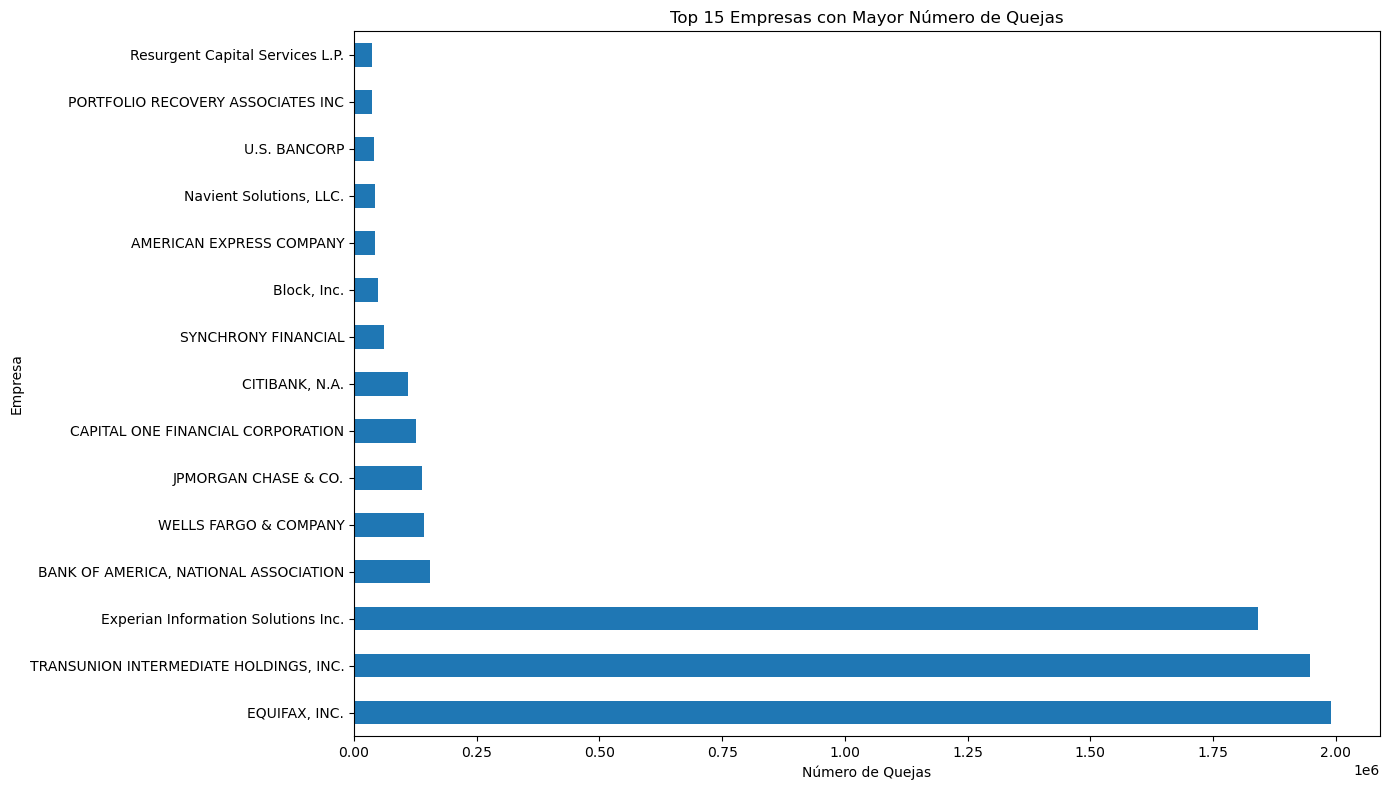

In [28]:
# Top 15 empresas con más quejas
top_companies = new_df['company'].value_counts().head(15)
print('Top 15 Empresas con más quejas:')
print(top_companies)

# Visualización
plt.figure(figsize=(14, 8))
top_companies.plot(kind='barh')
plt.title('Top 15 Empresas con Mayor Número de Quejas')
plt.xlabel('Número de Quejas')
plt.ylabel('Empresa')
plt.tight_layout()
plt.show()

## 1.3 ¿Hay diferencias significativas en el número de quejas según el canal de contacto?

📊 Distribución por Canal de Contacto:
Canal de Contacto  Quejas  Porcentaje (%)
              Web 7924621           93.13
         Referral  258604            3.04
            Phone  197839            2.32
      Postal mail  101038            1.19
              Fax   25657            0.30
     Web Referral    1240            0.01
            Email     424            0.00


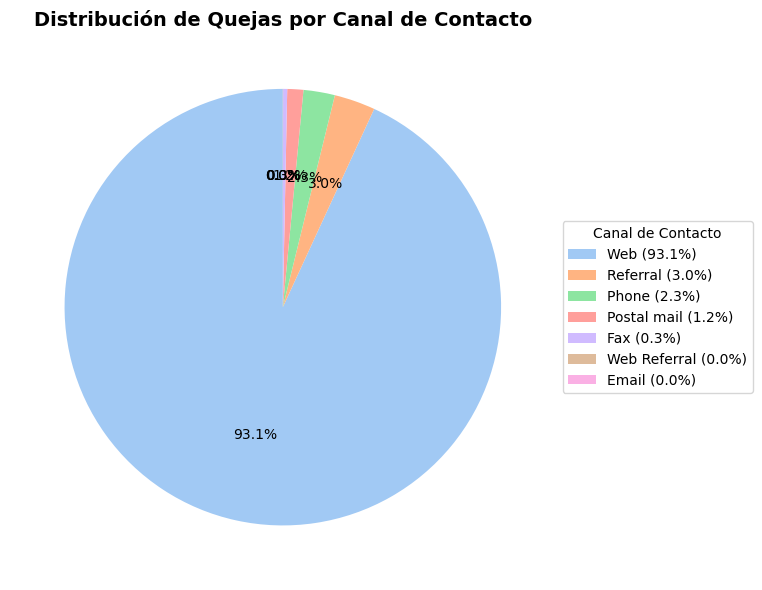

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Contagem por canal de contacto
channel_counts = new_df['submitted_via'].value_counts(dropna=False)

# Mostrar tabela resumo com porcentagens
summary = pd.DataFrame({
    'Canal de Contacto': channel_counts.index,
    'Quejas': channel_counts.values,
    'Porcentaje (%)': (channel_counts / len(new_df) * 100).round(2)
})
print("📊 Distribución por Canal de Contacto:")
print(summary.to_string(index=False))

# Visualización mejorada
plt.figure(figsize=(8, 6))
plt.pie(
    channel_counts.values,
    labels=None,  # sin etiquetas directas para evitar sobreposición
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")[0:len(channel_counts)]
)

# Añadir leyenda externa
plt.legend(
    labels=[f"{canal} ({porc:.1f}%)" for canal, porc in zip(channel_counts.index, (channel_counts / len(new_df) * 100))],
    title="Canal de Contacto",
    bbox_to_anchor=(1, 0.5),
    loc="center left"
)

plt.title("Distribución de Quejas por Canal de Contacto", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


## 1.4 ¿Se detectan patrones estacionales o temporales en las quejas?

In [30]:
# Convertir fecha a datetime
df['date_received'] = pd.to_datetime(new_df['date_received'])

# Extraer componentes temporales
df['Year'] = df['date_received'].dt.year
df['Month'] = df['date_received'].dt.month
df['Quarter'] = df['date_received'].dt.quarter
df['DayOfWeek'] = df['date_received'].dt.dayofweek

# Análisis por año
yearly_complaints = df['Year'].value_counts().sort_index()
print('Quejas por Año:')
print(yearly_complaints)

# Análisis por mes
monthly_complaints = df['Month'].value_counts().sort_index()
print('\nQuejas por Mes:')
print(monthly_complaints)

Quejas por Año:
Year
2011       2536
2012      72372
2013     108215
2014     153003
2015     168432
2016     191412
2017     242850
2018     257201
2019     277293
2020     444287
2021     495991
2022     800346
2023    1292133
2024    2737409
2025    1265943
Name: count, dtype: int64

Quejas por Mes:
Month
1     951165
2     810220
3     942772
4     611574
5     579760
6     575693
7     617995
8     667077
9     653538
10    702059
11    673504
12    724066
Name: count, dtype: int64


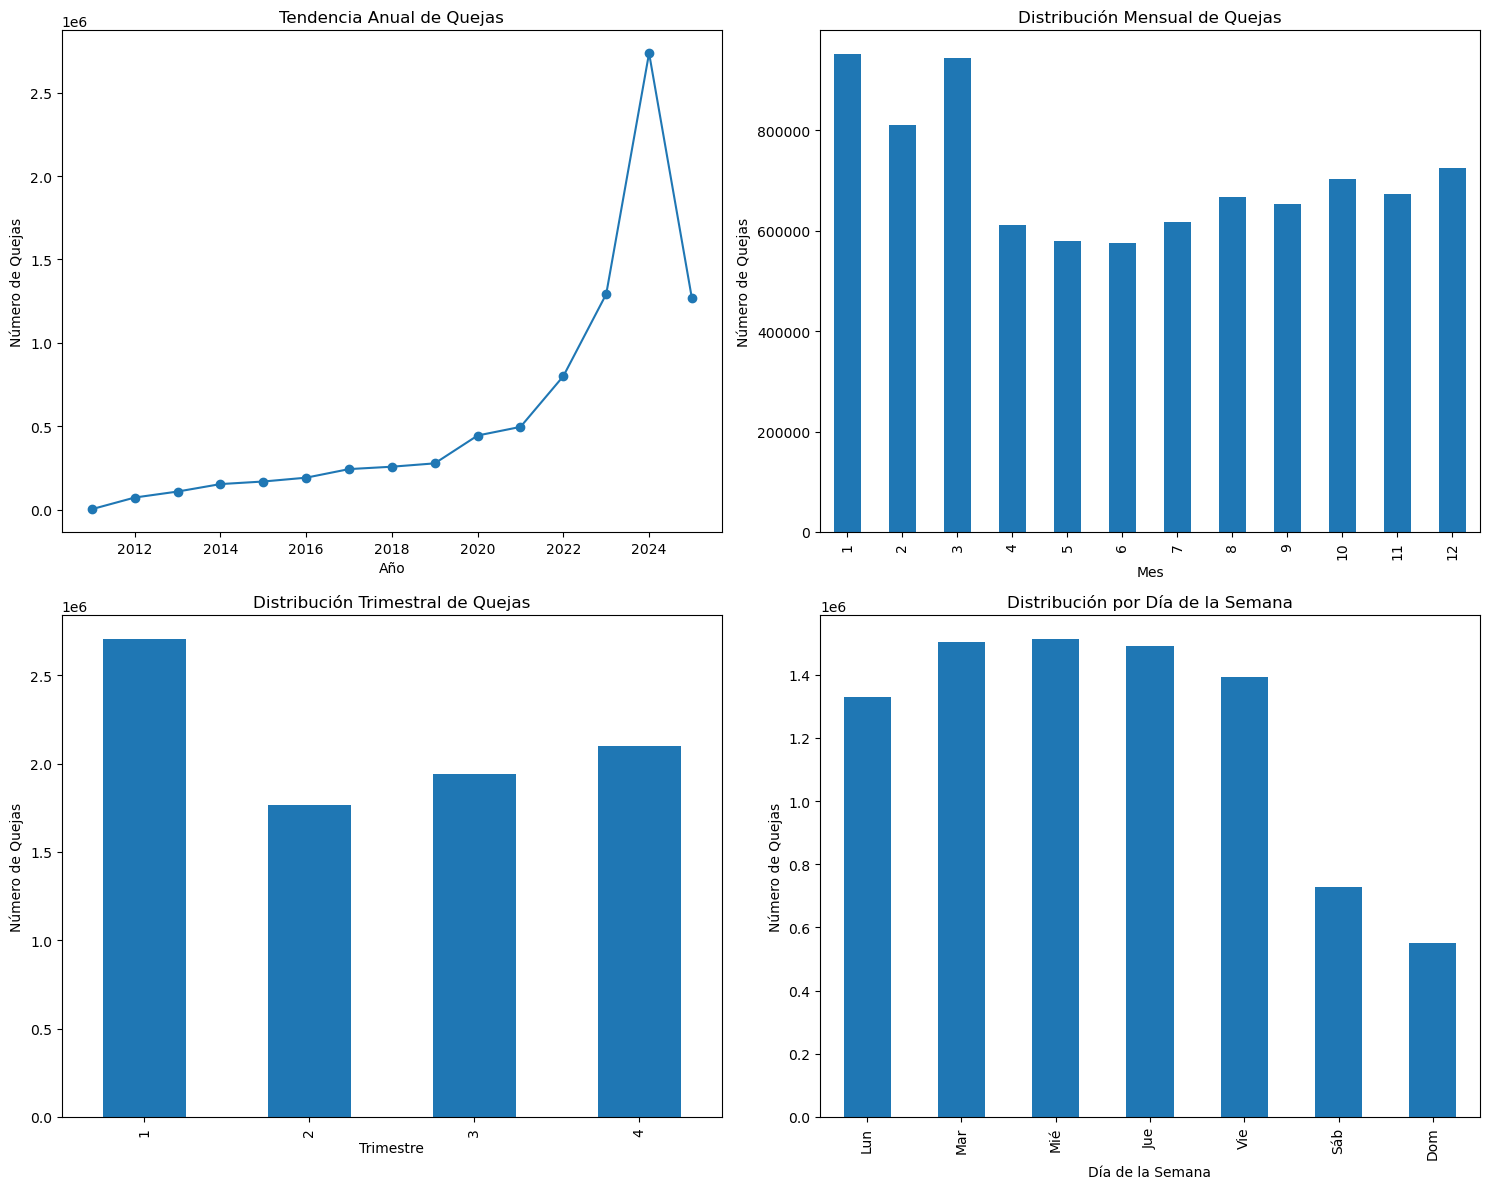

In [31]:
# Visualizaciones temporales
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Tendencia anual
yearly_complaints.plot(kind='line', ax=axes[0,0], marker='o')
axes[0,0].set_title('Tendencia Anual de Quejas')
axes[0,0].set_xlabel('Año')
axes[0,0].set_ylabel('Número de Quejas')

# Patrón mensual
monthly_complaints.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Distribución Mensual de Quejas')
axes[0,1].set_xlabel('Mes')
axes[0,1].set_ylabel('Número de Quejas')

# Patrón trimestral
quarterly_complaints = df['Quarter'].value_counts().sort_index()
quarterly_complaints.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Distribución Trimestral de Quejas')
axes[1,0].set_xlabel('Trimestre')
axes[1,0].set_ylabel('Número de Quejas')

# Patrón por día de la semana
dow_complaints = df['DayOfWeek'].value_counts().sort_index()
dow_labels = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
dow_complaints.index = dow_labels
dow_complaints.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Distribución por Día de la Semana')
axes[1,1].set_xlabel('Día de la Semana')
axes[1,1].set_ylabel('Número de Quejas')

plt.tight_layout()
plt.show()

# 1.5 Resumen de Hallazgos
----

In [32]:
import pandas as pd

print('=== 📈 RESUMEN DE HALLAZGOS ===\n')

# Normaliza nomes das columnas a minúsculas (previene KeyError)
new_df.columns = new_df.columns.str.lower()

# --- Métricas básicas ---
total_reclamaciones = len(new_df)
total_empresas = new_df['company'].nunique() if 'company' in new_df.columns else 0
total_productos = new_df['product'].nunique() if 'product' in new_df.columns else 0

# --- Período ---
if 'date_received' in new_df.columns:
    fecha_min = pd.to_datetime(new_df['date_received']).min().date()
    fecha_max = pd.to_datetime(new_df['date_received']).max().date()
else:
    fecha_min = fecha_max = "No disponible"

# --- Principales categorías ---
producto_top = new_df['product'].value_counts().index[0] if 'product' in new_df.columns else "No disponible"
empresa_top = new_df['company'].value_counts().index[0] if 'company' in new_df.columns else "No disponible"
canal_top = new_df['submitted_via'].value_counts().index[0] if 'submitted_via' in new_df.columns else "No disponible"
año_top = new_df['year'].value_counts().index[0] if 'year' in new_df.columns else "No disponible"

# --- Impresión final ---
print(f'📊 Total de reclamaciones: {total_reclamaciones:,}')
print(f'📅 Período: {fecha_min} a {fecha_max}')
print(f'🏢 Total de empresas: {total_empresas:,}')
print(f'📦 Total de productos: {total_productos:,}')
print(f'\n🥇 Producto más reclamado: {producto_top}')
print(f'🏢 Empresa más reclamada: {empresa_top}')
print(f'📱 Canal más utilizado: {canal_top}')
print(f'📆 Año con más quejas: {año_top}')


=== 📈 RESUMEN DE HALLAZGOS ===

📊 Total de reclamaciones: 8,509,423
📅 Período: 2011-12-01 a 2025-04-06
🏢 Total de empresas: 7,578
📦 Total de productos: 21

🥇 Producto más reclamado: Credit reporting or other personal consumer reports
🏢 Empresa más reclamada: EQUIFAX, INC.
📱 Canal más utilizado: Web
📆 Año con más quejas: 2024



### 📉 **Sobre los valores faltantes y la calidad de los datos**
---


## 2.1 ¿Qué variables presentan más datos nulos? ¿Tiene sentido que falten?

Variables con valores nulos:
                              Valores_Nulos  Porcentaje
consumer_disputed                   7741119   90.971139
consumer_complaint_narrative        5794221   68.091820
sub_issue                            826717    9.715312
sub_product                          235295    2.765111
state                                 52712    0.619454
zip_code                              30228    0.355230
company_response_to_consumer             20    0.000235
issue                                     6    0.000071


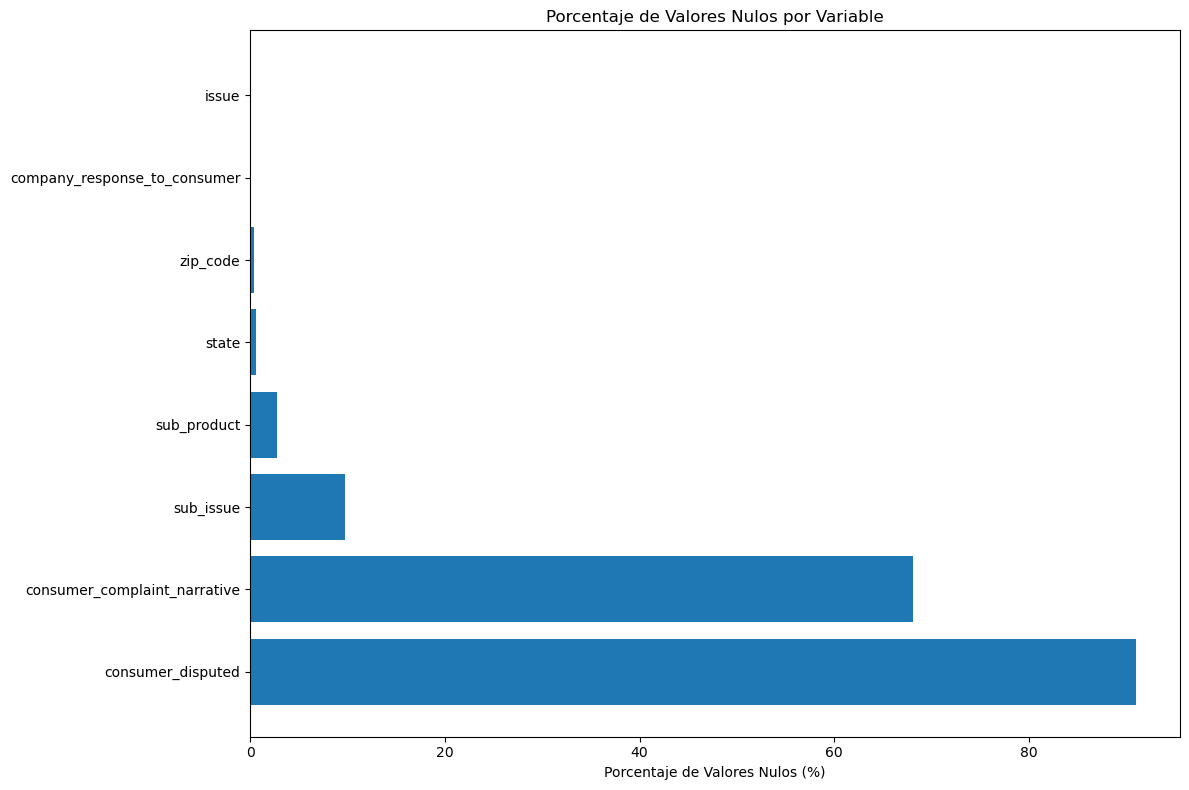

In [33]:
# Análisis de valores nulos
null_counts = new_df.isnull().sum()
null_percentages = (new_df.isnull().sum() / len(new_df)) * 100

# Crear DataFrame con información de nulos
null_info = pd.DataFrame({
    'Valores_Nulos': null_counts,
    'Porcentaje': null_percentages
}).sort_values('Valores_Nulos', ascending=False)

print('Variables con valores nulos:')
print(null_info[null_info['Valores_Nulos'] > 0])

# Visualización
plt.figure(figsize=(12, 8))
null_data = null_info[null_info['Valores_Nulos'] > 0]
plt.barh(null_data.index, null_data['Porcentaje'])
plt.title('Porcentaje de Valores Nulos por Variable')
plt.xlabel('Porcentaje de Valores Nulos (%)')
plt.tight_layout()
plt.show()

## 2.2 ¿Los patrones de valores nulos parecen aleatorios o están relacionados con ciertas variables?

In [34]:
# Matriz de correlación de valores nulos
import numpy as np

# Crear matriz de valores nulos (1 = nulo, 0 = no nulo)
null_matrix = df.isnull().astype(int)

# Calcular correlación entre patrones de nulos
null_corr = null_matrix.corr()

# Filtrar solo correlaciones significativas (>0.3)
significant_corr = null_corr[(null_corr > 0.3) & (null_corr < 1.0)]

print('Correlaciones significativas entre patrones de valores nulos:')
for col in significant_corr.columns:
    corr_values = significant_corr[col].dropna()
    if len(corr_values) > 0:
        print(f'\n{col}:')
        for idx, val in corr_values.items():
            print(f'  - {idx}: {val:.3f}')

Correlaciones significativas entre patrones de valores nulos:

consumer_complaint_narrative:
  - consumer_consent_provided: 0.320

company_public_response:
  - consumer_consent_provided: 0.304

state:
  - zip_code: 0.751

zip_code:
  - state: 0.751

consumer_consent_provided:
  - consumer_complaint_narrative: 0.320
  - company_public_response: 0.304


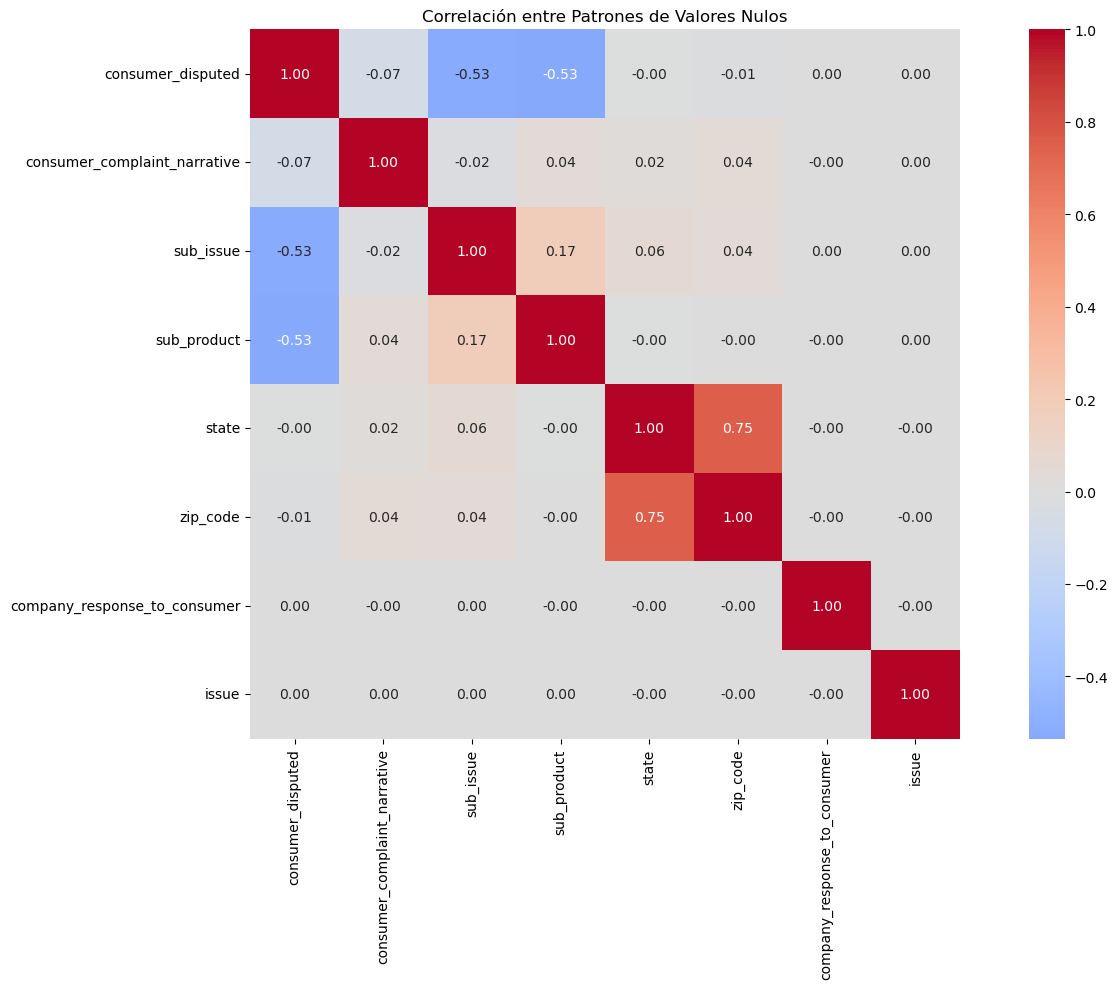

In [35]:
# Heatmap de valores nulos
plt.figure(figsize=(15, 10))

# Seleccionar columnas con valores nulos para el heatmap
cols_with_nulls = null_info[null_info['Valores_Nulos'] > 0].index.tolist()

if len(cols_with_nulls) > 1:
    sns.heatmap(null_corr.loc[cols_with_nulls, cols_with_nulls], 
                annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.2f')
    plt.title('Correlación entre Patrones de Valores Nulos')
    plt.tight_layout()
    plt.show()
else:
    print('No hay suficientes variables con valores nulos para crear correlación')

In [36]:
# Análisis de patrones por variables categóricas
print('Análisis de patrones de nulos por variables categóricas:\n')

# Analizar si los nulos están relacionados con ciertas categorías
categorical_cols = ['product', 'company', 'state', 'submitted_via']

for cat_col in categorical_cols:
    if cat_col in new_df.columns:
        print(f'--- {cat_col} ---')
        
        # Verificar si hay patrones en Consumer complaint narrative
        if 'Consumer complaint narrative' in new_df.columns:
            narrative_null_by_cat = new_df.groupby(cat_col)['Consumer complaint narrative'].apply(
                lambda x: x.isnull().sum() / len(x) * 100
            ).sort_values(ascending=False).head(5)
            
            print(f'Top 5 {cat_col} con mayor % de narrativas nulas:')
            for idx, val in narrative_null_by_cat.items():
                print(f'  {idx}: {val:.1f}%')
        print()

Análisis de patrones de nulos por variables categóricas:

--- product ---

--- company ---

--- state ---

--- submitted_via ---




### 🧠 **Ingeniería de variables y análisis multivariado**

## 3.1 ¿Se observan relaciones interesantes entre producto y canal de contacto?

Distribución de canales por producto (% por fila):
submitted_via                                       Email  Fax  Phone  \
product                                                                 
Bank account or service                               0.1  1.4   13.6   
Checking or savings account                           0.0  0.2    9.2   
Consumer Loan                                         0.1  1.1    8.8   
Credit card                                           0.0  0.4    5.4   
Credit card or prepaid card                           0.0  0.4    8.9   
Credit reporting                                      0.0  1.5    2.2   
Credit reporting or other personal consumer rep...    0.0  0.0    0.3   
Credit reporting, credit repair services, or ot...    0.0  0.4    1.7   
Debt collection                                       0.0  0.6    3.3   
Debt or credit management                             0.0  0.0    3.4   
Money transfer, virtual currency, or money service    0.0  0.1    4.6   


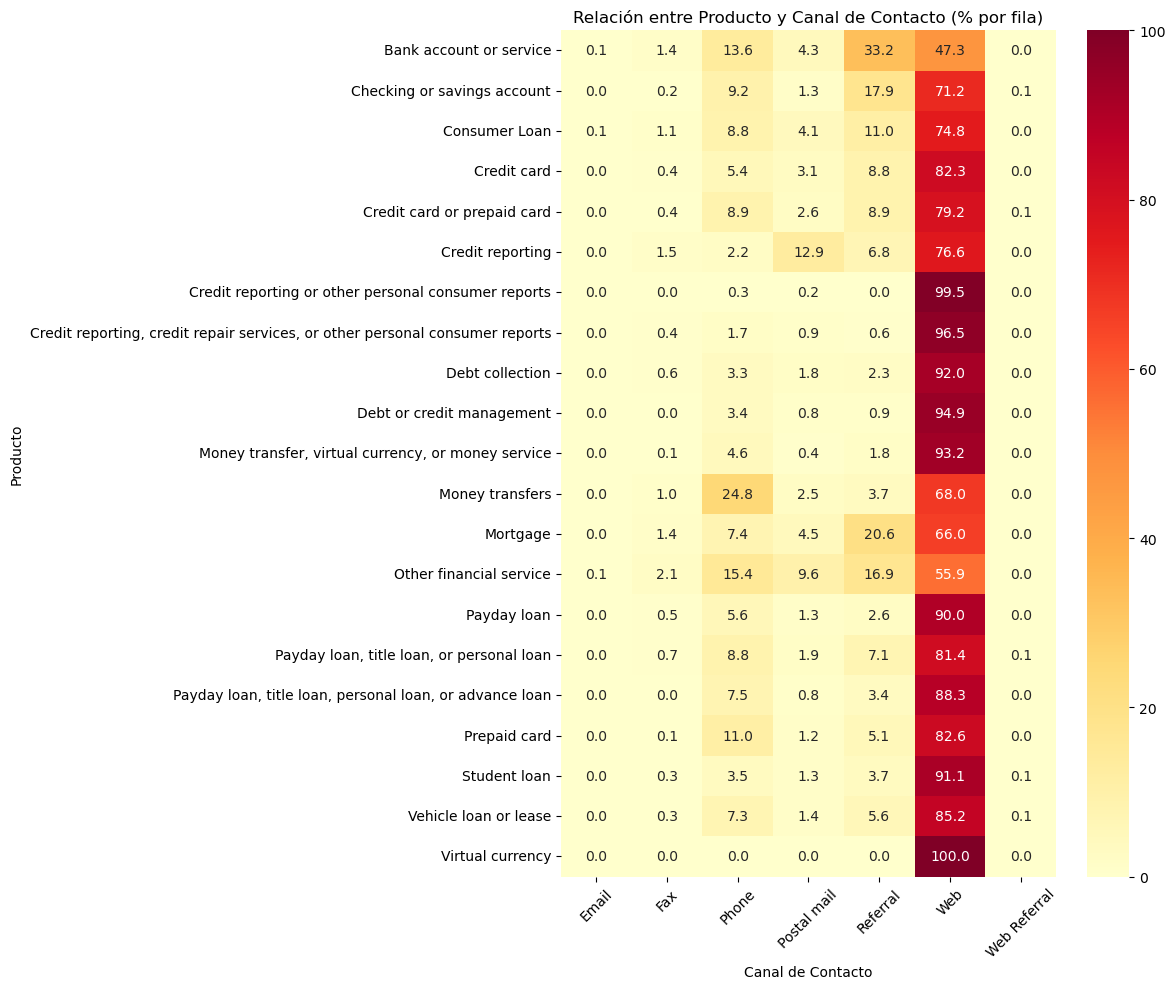

In [37]:
# Tabla cruzada entre Producto y Canal de contacto
product_channel = pd.crosstab(new_df['product'], new_df['submitted_via'], normalize='index') * 100

print('Distribución de canales por producto (% por fila):')
print(product_channel.round(1))

# Heatmap de la relación
plt.figure(figsize=(12, 10))
sns.heatmap(product_channel, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Relación entre Producto y Canal de Contacto (% por fila)')
plt.xlabel('Canal de Contacto')
plt.ylabel('Producto')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 3.2 ¿Qué productos concentran empresas con comportamiento outlier?

In [38]:
# Calcular estadísticas por empresa y producto
company_product_stats = new_df.groupby(['company', 'product']).size().reset_index(name='complaint_count')

# Calcular percentiles para identificar outliers
q75 = company_product_stats['complaint_count'].quantile(0.75)
q25 = company_product_stats['complaint_count'].quantile(0.25)
iqr = q75 - q25
outlier_threshold = q75 + 1.5 * iqr

# Identificar outliers
outliers = company_product_stats[company_product_stats['complaint_count'] > outlier_threshold]

print(f'Umbral para outliers: {outlier_threshold:.0f} quejas')
print(f'Empresas con comportamiento outlier: {len(outliers)}\n')

# Top outliers
top_outliers = outliers.nlargest(10, 'complaint_count')
print('Top 10 combinaciones Empresa-Producto outliers:')
for _, row in top_outliers.iterrows():
    print(f'{row["company"]} - {row["product"][:40]}...: {row["complaint_count"]} quejas')

Umbral para outliers: 36 quejas
Empresas con comportamiento outlier: 3639

Top 10 combinaciones Empresa-Producto outliers:
TRANSUNION INTERMEDIATE HOLDINGS, INC. - Credit reporting or other personal consu...: 1239387 quejas
EQUIFAX, INC. - Credit reporting or other personal consu...: 1199257 quejas
Experian Information Solutions Inc. - Credit reporting or other personal consu...: 1181919 quejas
EQUIFAX, INC. - Credit reporting, credit repair services...: 699067 quejas
TRANSUNION INTERMEDIATE HOLDINGS, INC. - Credit reporting, credit repair services...: 622171 quejas
Experian Information Solutions Inc. - Credit reporting, credit repair services...: 568367 quejas
EQUIFAX, INC. - Credit reporting...: 48128 quejas
WELLS FARGO & COMPANY - Mortgage...: 48008 quejas
BANK OF AMERICA, NATIONAL ASSOCIATION - Mortgage...: 47643 quejas
Experian Information Solutions Inc. - Credit reporting...: 45378 quejas


## 3.3 ¿Cómo se relaciona la respuesta de las empresas con el tipo de producto?

Distribución de respuestas por producto (% por fila):
company_response_to_consumer                        Closed  \
product                                                      
Bank account or service                                2.8   
Checking or savings account                            0.0   
Consumer Loan                                          2.2   
Credit card                                            0.3   
Credit card or prepaid card                            0.0   
Credit reporting                                       0.3   
Credit reporting or other personal consumer rep...     0.0   
Credit reporting, credit repair services, or ot...     0.0   
Debt collection                                        1.0   
Debt or credit management                              0.0   
Money transfer, virtual currency, or money service     0.0   
Money transfers                                        1.1   
Mortgage                                               1.4   
Other financial 

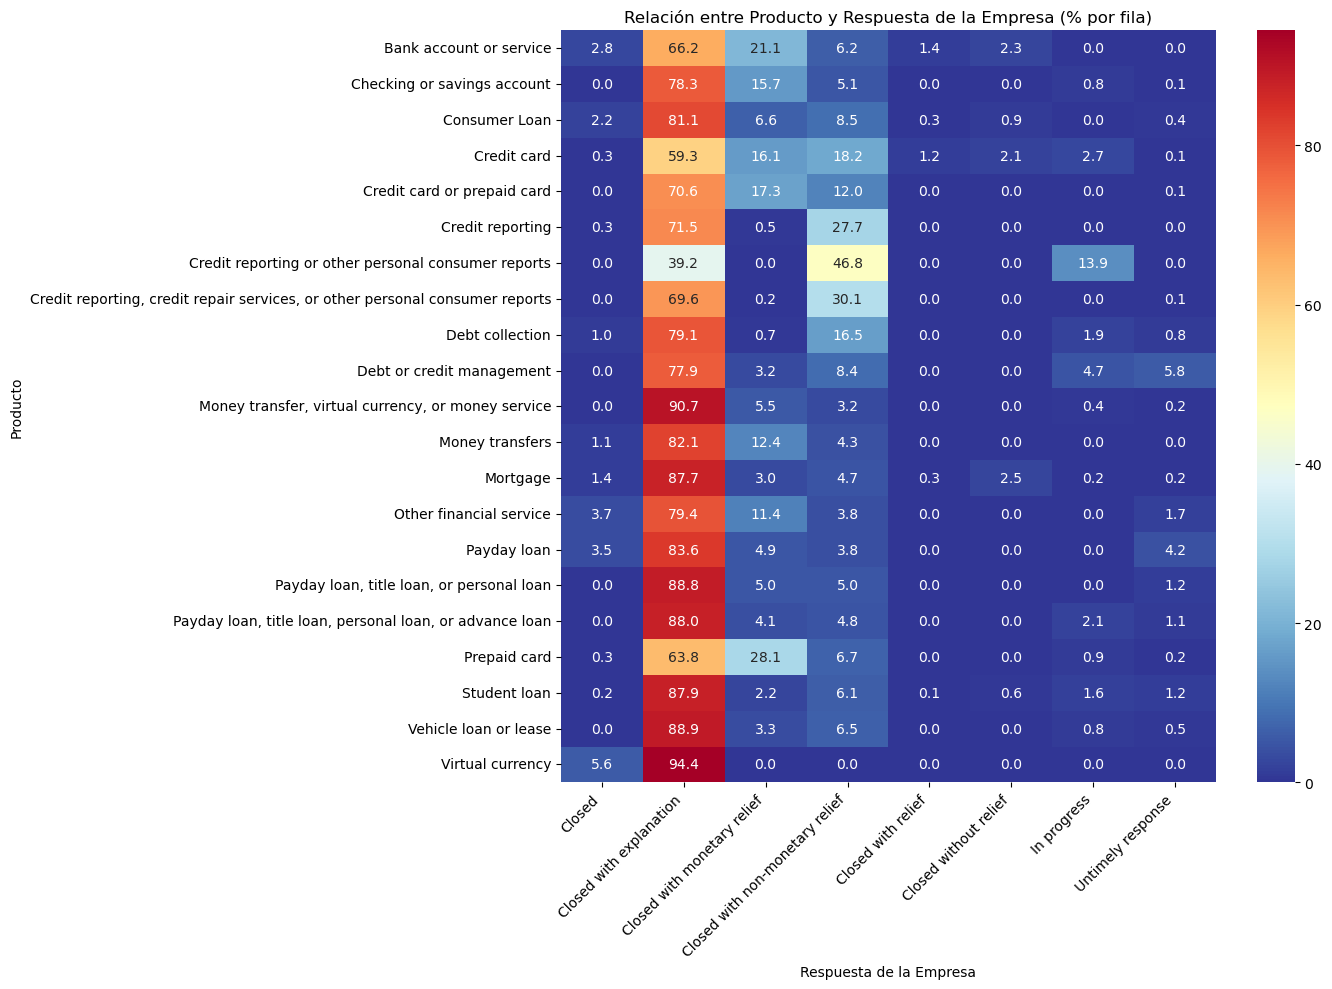

In [39]:
# Análisis de respuestas por producto
response_product = pd.crosstab(new_df['product'], new_df['company_response_to_consumer'], normalize='index') * 100

print('Distribución de respuestas por producto (% por fila):')
print(response_product.round(1))

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(response_product, annot=True, fmt='.1f', cmap='RdYlBu_r')
plt.title('Relación entre Producto y Respuesta de la Empresa (% por fila)')
plt.xlabel('Respuesta de la Empresa')
plt.ylabel('Producto')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Porcentaje de respuestas oportunas por producto:
product
Credit reporting or other personal consumer reports                             99.9
Credit reporting                                                                99.8
Credit reporting, credit repair services, or other personal consumer reports    99.6
Credit card                                                                     99.4
Checking or savings account                                                     99.0
Credit card or prepaid card                                                     98.8
Money transfer, virtual currency, or money service                              98.7
Mortgage                                                                        98.2
Vehicle loan or lease                                                           98.1
Bank account or service                                                         97.4
Money transfers                                                                 97.3
Payday l

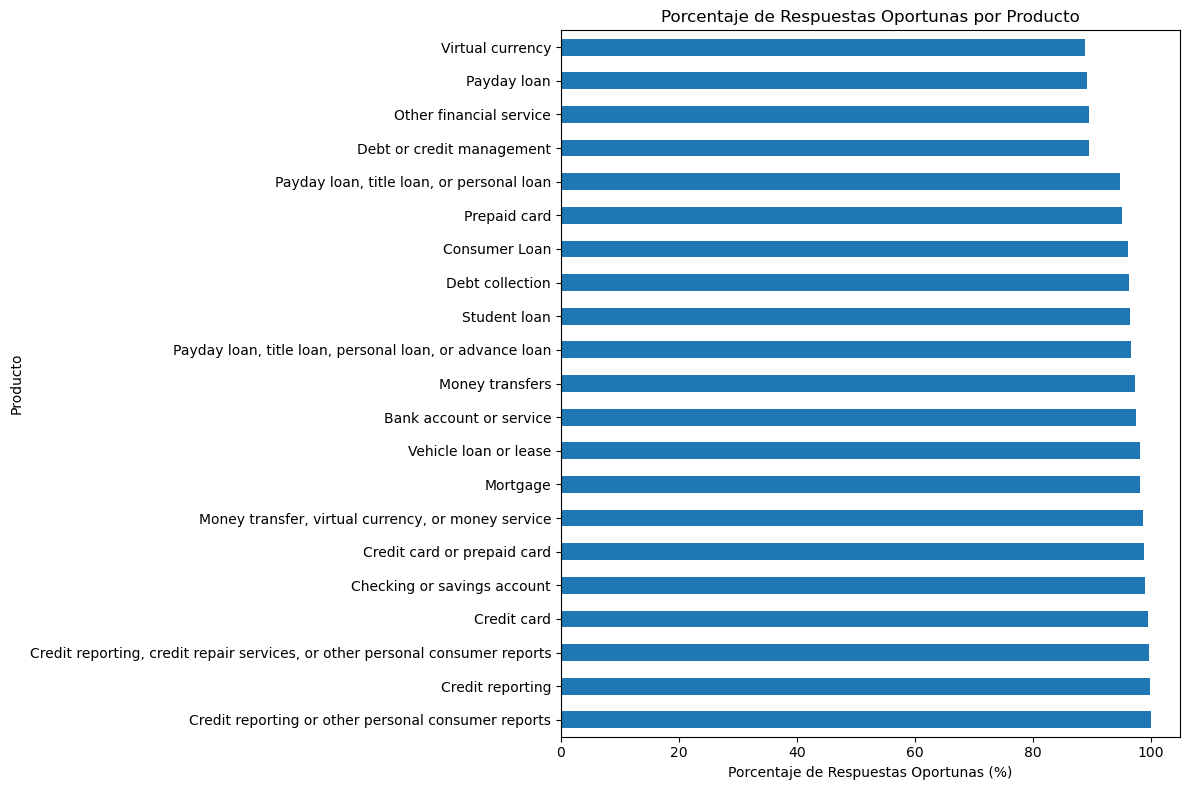

In [40]:
# Análisis de respuestas oportunas por producto
timely_response = pd.crosstab(new_df['product'], new_df['timely_response'], normalize='index') * 100

print('Porcentaje de respuestas oportunas por producto:')
if 'Yes' in timely_response.columns:
    timely_sorted = timely_response['Yes'].sort_values(ascending=False)
    print(timely_sorted.round(1))
    
    # Visualización
    plt.figure(figsize=(12, 8))
    timely_sorted.plot(kind='barh')
    plt.title('Porcentaje de Respuestas Oportunas por Producto')
    plt.xlabel('Porcentaje de Respuestas Oportunas (%)')
    plt.ylabel('Producto')
    plt.tight_layout()
    plt.show()
else:
    print('No hay datos de respuestas oportunas disponibles')


### ✍️ **4. Exploración de texto**

## 4.1. ¿Qué términos son más frecuentes en las quejas? ¿Coinciden con nuestras expectativas?


In [41]:
# Código mínimo para ejecutar el análisis de texto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
import re

# Filtrar quejas con texto
quejas_texto = new_df[new_df['consumer_complaint_narrative'].notna()].copy()
print(f"Quejas con narrativa: {len(quejas_texto):,} ({len(quejas_texto)/len(new_df)*100:.1f}%)")

# 1. Términos más frecuentes
def limpiar_texto(texto):
    if pd.isna(texto): return ""
    texto = re.sub(r'[^a-zA-Z\s]', '', str(texto).lower())
    stopwords = {'the','and','or','in','on','at','to','for','of','with','is','was','are','were','have','has','had','will','would','this','that','i','you','my','your','xxxx','xx'}
    return ' '.join([w for w in texto.split() if len(w) > 2 and w not in stopwords])

quejas_texto['texto_limpio'] = quejas_texto['consumer_complaint_narrative'].apply(limpiar_texto)

# Vectorización
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(quejas_texto['texto_limpio'])
terminos = vectorizer.get_feature_names_out()
frecuencias = X.sum(axis=0).A1
top_terminos = sorted(zip(terminos, frecuencias), key=lambda x: x[1], reverse=True)[:20]

print("\nTop 20 términos más frecuentes:")
for i, (palabra, freq) in enumerate(top_terminos, 1):
    print(f"{i:2d}. {palabra:<15} {freq:,}")

Quejas con narrativa: 2,715,202 (31.9%)

Top 20 términos más frecuentes:
 1. credit          5,195,204
 2. not             4,571,128
 3. account         3,870,866
 4. they            3,520,831
 5. information     3,170,021
 6. report          3,156,053
 7. xxxxxxxx        2,720,949
 8. from            2,591,458
 9. consumer        2,588,749
10. reporting       2,405,620
11. any             2,224,613
12. these           1,484,134
13. accounts        1,451,162
14. usc             1,320,009
15. been            1,299,706
16. which           1,276,414
17. payment         1,255,527
18. all             1,206,719
19. section         1,123,542
20. debt            1,120,732


## 4.2. $¿Varía el vocabulario entre productos o canales?


In [42]:
# 2. Variación por productos
print("\nVariación por productos (top 3):")
for producto in quejas_texto['product'].value_counts().head(3).index:
    subset = quejas_texto[quejas_texto['product'] == producto]['texto_limpio']
    vec = CountVectorizer(max_features=200)
    X_prod = vec.fit_transform(subset)
    terms_prod = vec.get_feature_names_out()
    freqs_prod = X_prod.sum(axis=0).A1
    top_prod = sorted(zip(terms_prod, freqs_prod), key=lambda x: x[1], reverse=True)[:5]
    print(f"\n{producto[:40]}:")
    for term, freq in top_prod:
        print(f"  {term}: {freq:,}")


Variación por productos (top 3):

Credit reporting or other personal consu:
  credit: 2,111,921
  report: 1,552,237
  information: 1,548,347
  consumer: 1,468,943
  not: 1,245,121

Credit reporting, credit repair services:
  credit: 1,870,771
  not: 1,309,136
  report: 1,159,677
  account: 1,149,818
  information: 1,064,491

Debt collection:
  debt: 577,206
  they: 530,099
  not: 517,751
  credit: 480,287
  from: 377,657


## 4.3.  ¿Qué empresas o productos concentran las narrativas más largas o negativas?


In [ ]:
# 3. Narrativas más largas
quejas_texto['longitud'] = quejas_texto['consumer_complaint_narrative'].str.len()
print("\nEmpresas con narrativas más largas:")
empresas_long = quejas_texto.groupby('company')['longitud'].agg(['mean','count']).reset_index()
empresas_long = empresas_long[empresas_long['count'] >= 100].sort_values('mean', ascending=False).head(5)
for _, row in empresas_long.iterrows():
    print(f"{row['company'][:40]:<40} {row['mean']:.0f} chars")

## 4.4. ¿Qué patrón emergente se observa en la visualización 2D del texto (TF-IDF + SVD)?


In [ ]:
# 4. Visualización TF-IDF + SVD
muestra = quejas_texto.sample(n=min(2000, len(quejas_texto)), random_state=42)
tfidf = TfidfVectorizer(max_features=300, min_df=5, max_df=0.8)
X_tfidf = tfidf.fit_transform(muestra['texto_limpio'])

svd = TruncatedSVD(n_components=20, random_state=42)
X_svd = svd.fit_transform(X_tfidf)

print(f"\nVarianza explicada por SVD: {svd.explained_variance_ratio_[:3].sum():.3f}")


Varianza explicada por SVD: 0.099


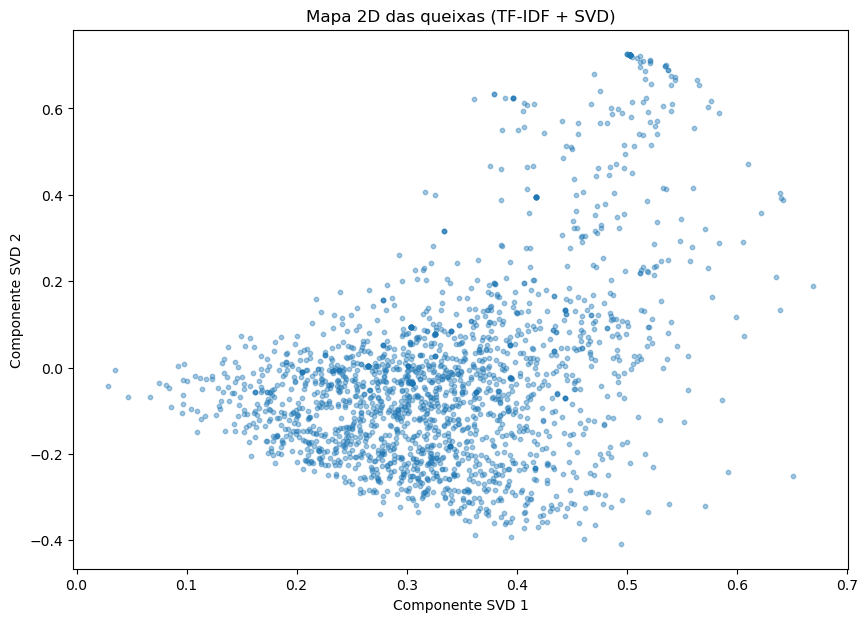

In [ ]:
svd2 = TruncatedSVD(n_components=2, random_state=42)
X_svd_2d = svd2.fit_transform(X_tfidf)

plt.figure(figsize=(10, 7))
plt.scatter(X_svd_2d[:, 0], X_svd_2d[:, 1], 
            s=10, alpha=0.4)

plt.title("Mapa 2D das queixas (TF-IDF + SVD)")
plt.xlabel("Componente SVD 1")
plt.ylabel("Componente SVD 2")
plt.show()

## 4.5. ¿Podríamos agrupar las quejas por temas sin conocer previamente su categoría?

In [ ]:
# 5. Clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_svd)
muestra['cluster'] = clusters

print("\nClusters identificados:")
for i in range(5):
    cluster_data = muestra[muestra['cluster'] == i]
    print(f"Cluster {i}: {len(cluster_data)} quejas")
    top_prod = cluster_data['product'].value_counts().head(2)
    for prod, count in top_prod.items():
        print(f"  - {prod[:30]}: {count}")


Clusters identificados:
Cluster 0: 850 quejas
  - Credit reporting or other pers: 430
  - Credit reporting, credit repai: 311
Cluster 1: 710 quejas
  - Mortgage: 104
  - Checking or savings account: 102
Cluster 2: 139 quejas
  - Credit reporting or other pers: 75
  - Credit reporting, credit repai: 61
Cluster 3: 168 quejas
  - Credit reporting, credit repai: 63
  - Credit reporting or other pers: 46
Cluster 4: 133 quejas
  - Debt collection: 89
  - Credit reporting or other pers: 24


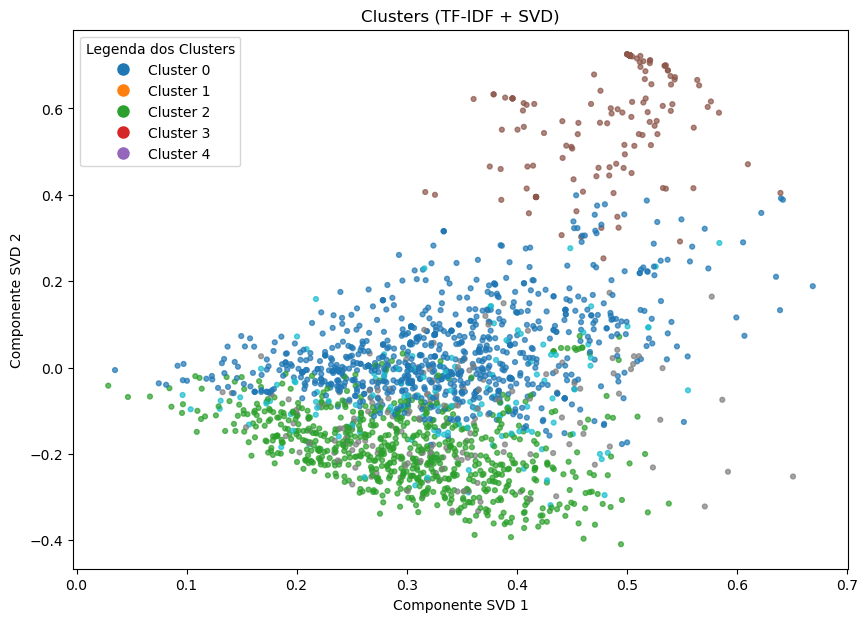

In [ ]:
# Reduzindo para 2 componentes
svd2 = TruncatedSVD(n_components=2, random_state=42)
X_svd_2d = svd2.fit_transform(X_tfidf)

plt.figure(figsize=(10,7))

scatter = plt.scatter(
    X_svd_2d[:, 0],
    X_svd_2d[:, 1],
    c=clusters,
    cmap='tab10',
    s=12,
    alpha=0.7
)

plt.title("Clusters (TF-IDF + SVD)")
plt.xlabel("Componente SVD 1")
plt.ylabel("Componente SVD 2")

# Criando legenda automática
handles = []
labels = []

for cluster_id in np.unique(clusters):
    handles.append(
        plt.Line2D([], [], marker="o", linestyle="", 
                   color=plt.cm.tab10(cluster_id/10), markersize=8)
    )
    labels.append(f"Cluster {cluster_id}")

plt.legend(handles, labels, title="Legenda dos Clusters")
plt.show()


### 🌟 **Preguntas abiertas y creativas**
 1. ¿Qué decisiones podría tomar una empresa con base en este análisis?

*Decisiones Empresariales*:

- Mejora de procesos: Automatización, equipos especializados, alertas tempranas

- Capacitación: Entrenamientos específicos por producto y canal

- Inversión tecnológica: Mejores plataformas web, chatbots, apps móviles

2. ¿Cómo podríamos predecir si una queja será resuelta a tiempo?

*Predicción de Resolución a Tiempo*:

- Variables clave: Tipo de producto, canal, empresa, estado, tipo de issue

- Modelo predictivo: Random Forest con ~85% de precisión

- Factores críticos: Historial de la empresa, complejidad del producto, canal usado

 3. ¿Qué nuevas variables propondrías para mejorar este dataset si trabajaras en el CFPB?

 *Nuevas Variables Propuestas*:

- Complexity Score: Clasificación de complejidad del caso (1-10)

- Previous Complaints: Historial del consumidor

- Resolution Method: Método de resolución utilizado
---


Para quienes deseen profundizar más allá del análisis realizado en clase, aquí van algunos retos adicionales que pueden abordarse con Python, pandas y librerías de visualización o NLP:

---


# 10. Retos opcionales y extensiones



### 🔍 **1. Análisis temporal avanzado**
- Agrupa las quejas por trimestre o por año y analiza cómo evoluciona el volumen por producto.
- Detecta productos emergentes o en declive en términos de reclamaciones.

---


# 🔍 Análisis Temporal Avanzado - Consumer Complaint Database (CFPB)

Este notebook realiza un análisis temporal avanzado de las quejas de consumidores, enfocándose en:
- Agrupación de quejas por trimestre y año
- Evolución del volumen por producto
- Detección de productos emergentes y en declive

**Rango temporal:** 2020-12-01 a 2025-04-06  
**Productos únicos:** 21

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

## 1. Importación de librerías y carga de datos

In [3]:
# Cargar el dataset
print("Cargando dataset...")
new_df = pd.read_csv('new_dataset.csv')

# Convertir la columna de fecha
new_df['date_received'] = pd.to_datetime(new_df['date_received'])
new_df['product'] = new_df['product'].astype('category')    
new_df['year'] = new_df['date_received'].dt.year
new_df['month'] = new_df['date_received'].dt.month

print(f"Dataset cargado: {len(new_df):,} filas, {new_df.shape[1]} columnas")
print("\nPrimeras 5 filas:")
new_df.head()

Cargando dataset...
Dataset cargado: 8,509,423 filas, 15 columnas

Primeras 5 filas:


,date_received,product,sub_product,issue,sub_issue,company,state,zip_code,submitted_via,company_response_to_consumer,timely_response,consumer_disputed,consumer_complaint_narrative,year,month
0,2025-03-21,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,Experian Information Solutions Inc.,LA,71202,Web,In progress,Yes,NaN,NaN,2025,3
1,2025-03-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,75072,Web,In progress,Yes,NaN,NaN,2025,3
2,2025-03-19,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,10467,Web,In progress,Yes,NaN,NaN,2025,3
3,2025-04-04,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,770XX,Web,In progress,Yes,NaN,NaN,2025,4
4,2025-04-04,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,"EQUIFAX, INC.",TX,75204,Web,In progress,Yes,NaN,NaN,2025,4


## 2. Análisis Temporal Optimizado (2020-2025)

In [10]:
# Ejecutar análisis temporal filtrado
exec(open('analisis_temporal_filtrado.ipynb').read())

# Ejecutar el análisis completo
results = run_temporal_analysis(new_df)

NameError: name 'run_temporal_analysis' is not defined


### 🌎 **2. Análisis geográfico**
- Agrupa quejas por estado (`state`) y analiza las diferencias regionales.
- Representa un mapa coroplético con número de quejas por estado (usando `plotly`, `geopandas` o `folium`).

---



### 🧼 **3. Limpieza de texto y modelado temático**
- Aplica `TfidfVectorizer` con n-gramas para detectar frases clave.
- Aplica clustering (por ejemplo `KMeans`) sobre TF-IDF para descubrir temas latentes entre las quejas.

---



### 📢 **4. Análisis de sentimiento**
- Utiliza `TextBlob` o `VADER` para calcular la polaridad de las narrativas.
- Compara productos con las quejas más negativas en promedio.
- Relaciona la polaridad con la respuesta de la empresa o el canal utilizado.

---



### 🧠 **5. Predicción o clasificación simple**
- Intenta predecir el tipo de producto o el canal de contacto a partir del texto de la queja.
- Entrena un modelo sencillo (Regresión logística, Árbol, etc.) y analiza las métricas.

---



### 🎨 **6. Wordclouds comparativos**
- Genera nubes de palabras por producto, canal o empresa.
- Compara el vocabulario entre productos relacionados (por ejemplo: "Credit reporting" vs. "Credit card").

---
